In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
### Шаг 1: Чтение и понимание данных:

1. Импорт данных с использованием библиотеки pandas
2. Понимание структуры данных

In [13]:
df = pd.read_csv('car_price_prediction.csv')
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [14]:
df.shape

(19237, 18)

In [15]:
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [7]:
#### Step 2: Очистка и подготовка данных

In [21]:
Manufacturer = df['Model'].apply(lambda x: x.split(' ')[0])
if 'Manufacturer' in df.columns:
    df['Manufacturer'] = Manufacturer
else:
    df.insert(3, 'Manufacturer', Manufacturer)
df.drop(['Model'], axis=1, inplace=True)
df.head()



,ID,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [23]:
df.Manufacturer.unique()

array(['LEXUS', 'CHEVROLET', 'HONDA', 'FORD', 'HYUNDAI', 'TOYOTA',
       'MERCEDES-BENZ', 'OPEL', 'PORSCHE', 'BMW', 'JEEP', 'VOLKSWAGEN',
       'AUDI', 'RENAULT', 'NISSAN', 'SUBARU', 'DAEWOO', 'KIA',
       'MITSUBISHI', 'SSANGYONG', 'MAZDA', 'GMC', 'FIAT', 'INFINITI',
       'ALFA', 'SUZUKI', 'ACURA', 'LINCOLN', 'VAZ', 'GAZ', 'CITROEN',
       'LAND', 'MINI', 'DODGE', 'CHRYSLER', 'JAGUAR', 'ISUZU', 'SKODA',
       'DAIHATSU', 'BUICK', 'TESLA', 'CADILLAC', 'PEUGEOT', 'BENTLEY',
       'VOLVO', 'სხვა', 'HAVAL', 'HUMMER', 'SCION', 'UAZ', 'MERCURY',
       'ZAZ', 'ROVER', 'SEAT', 'LANCIA', 'MOSKVICH', 'MASERATI',
       'FERRARI', 'SAAB', 'LAMBORGHINI', 'ROLLS-ROYCE', 'PONTIAC',
       'SATURN', 'ASTON', 'GREATWALL'], dtype=object)

In [24]:
#Проверка на наличие дубликатов
df.loc[df.duplicated()]

,ID,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
425,45815372,7840,-,MERCEDES-BENZ,1998,Sedan,No,CNG,2,180003 km,4.0,Manual,Rear,04-May,Left wheel,Black,4
1581,45815363,8781,-,TOYOTA,2002,Hatchback,No,Petrol,1.5,117000 km,4.0,Automatic,4x4,04-May,Right-hand drive,Red,4
1697,45732125,18503,-,TOYOTA,2010,Sedan,No,Petrol,1.8,162000 km,4.0,Automatic,Front,04-May,Left wheel,Grey,12
1972,45507765,20385,-,MERCEDES-BENZ,2005,Sedan,Yes,Petrol,5,230000 km,8.0,Tiptronic,Rear,04-May,Left wheel,Silver,10
2131,45815363,8781,-,TOYOTA,2002,Hatchback,No,Petrol,1.5,117000 km,4.0,Automatic,4x4,04-May,Right-hand drive,Red,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,45815465,2352,1273,LEXUS,2015,Sedan,Yes,Petrol,3.5,80856 km,6.0,Automatic,4x4,04-May,Left wheel,Black,12
19137,45810466,15125,642,CHEVROLET,2012,Jeep,Yes,Diesel,2,156834 km,4.0,Automatic,Front,04-May,Left wheel,Golden,4
19200,45725908,36065,640,MERCEDES-BENZ,2013,Sedan,Yes,Petrol,2.0 Turbo,68000 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,12
19203,45761487,13485,645,TOYOTA,2011,Sedan,No,Hybrid,1.8,281600 km,6.0,Automatic,Front,04-May,Left wheel,Grey,8


In [25]:
df.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [26]:
### Step 3: Визуализация данных


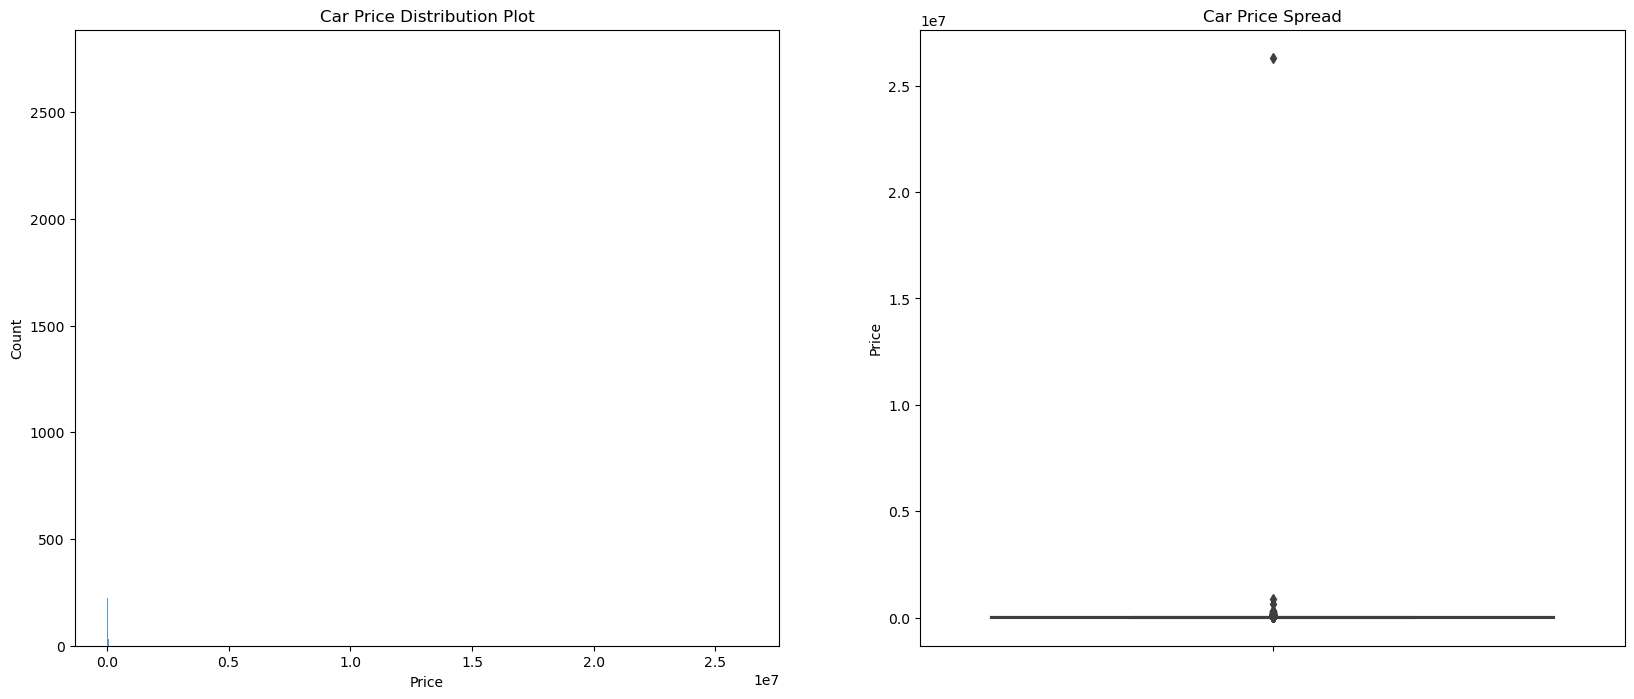

In [32]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.histplot(df.Price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=df.Price)

plt.show()


In [33]:
print(df.Price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count    1.923700e+04
mean     1.855593e+04
std      1.905813e+05
min      1.000000e+00
25%      5.331000e+03
50%      1.317200e+04
75%      2.207500e+04
85%      3.073400e+04
90%      3.860900e+04
100%     2.630750e+07
max      2.630750e+07
Name: Price, dtype: float64


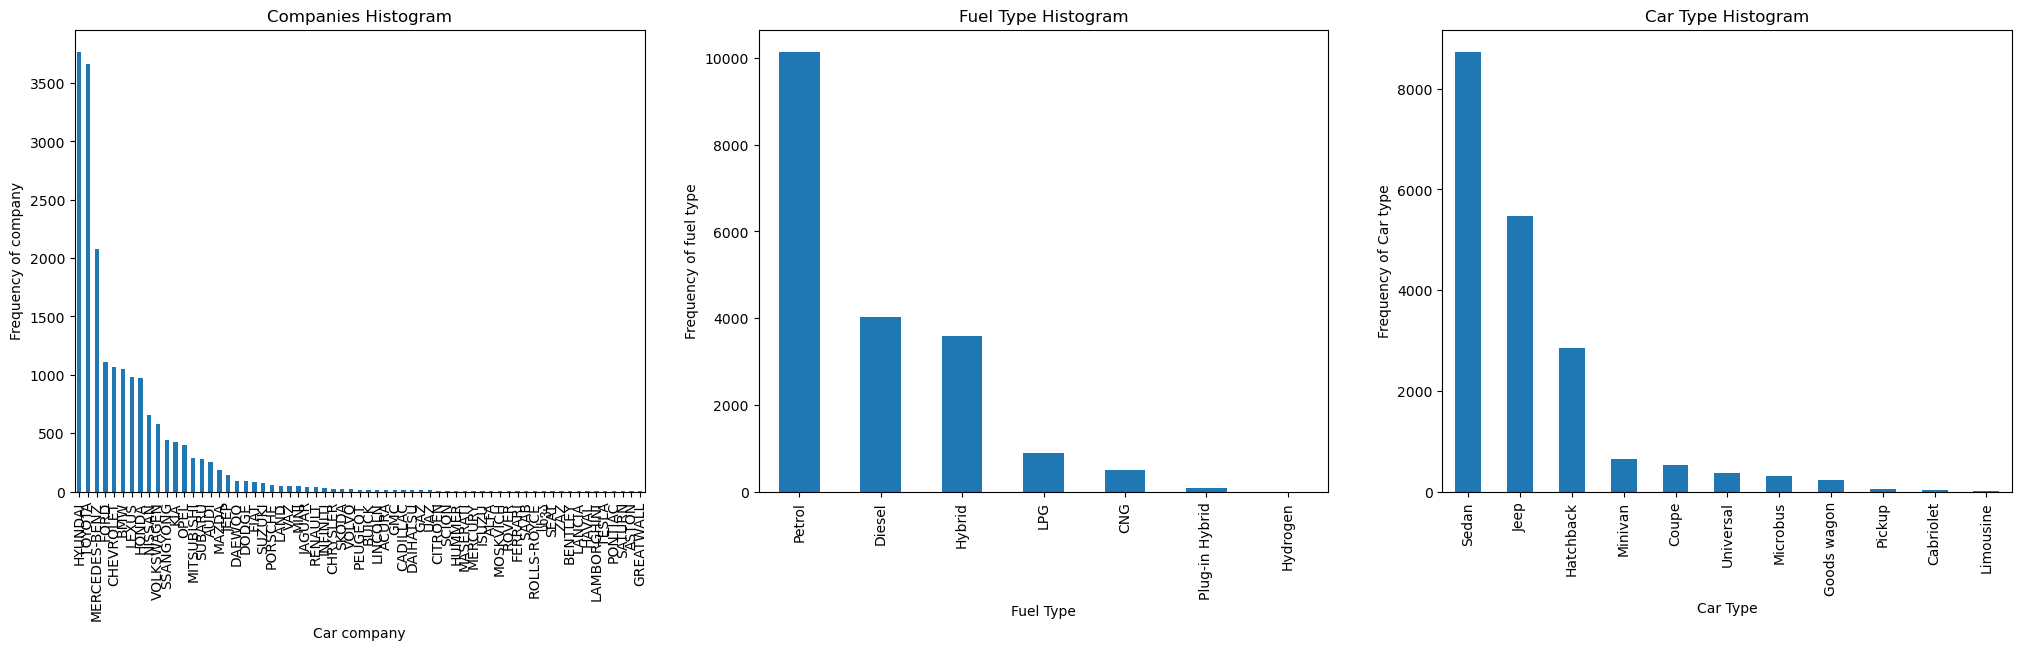

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 6))

plt.subplot(1, 3, 1)
plt1 = df['Manufacturer'].value_counts().plot(kind='bar')
plt.title('Companies Histogram')
plt1.set(xlabel='Car company', ylabel='Frequency of company')

plt.subplot(1, 3, 2)
plt2 = df['Fuel type'].value_counts().plot(kind='bar')
plt.title('Fuel Type Histogram')
plt2.set(xlabel='Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1, 3, 3)
plt3 = df['Category'].value_counts().plot(kind='bar')
plt.title('Car Type Histogram')
plt3.set(xlabel='Car Type', ylabel='Frequency of Car type')

plt.show()


In [47]:
#Выводы:
#Hyunday самый любимый автомобиль компании
#Количество автомобилей работающих на топливе, больше чем количество автомобилей работающих на дизеле
#Седан является наиболее предпочитаемым видом автомобиля

In [ ]:
#График для значений подушки безопасности и цилиндра

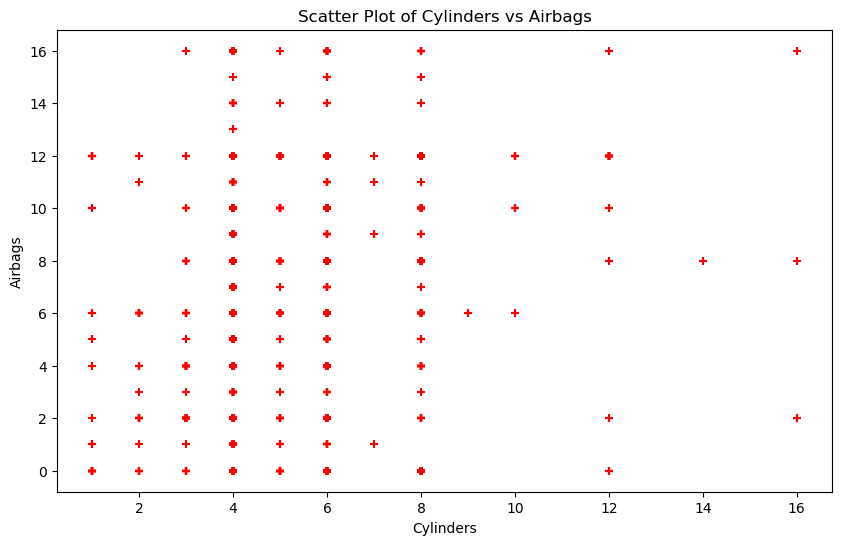

In [82]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.scatter(df['Cylinders'], df['Airbags'], color='red', marker='+')
plt.title('Scatter Plot of Cylinders vs Airbags')
plt.xlabel('Cylinders')
plt.ylabel('Airbags')

plt.show()

In [83]:
Cylinders = df.Cylinders
Cylinders.head()

0    6.0
1    6.0
2    4.0
3    4.0
4    4.0
Name: Cylinders, dtype: float64

In [84]:
Airbags = df.Airbags
Airbags.head()

0    12
1     8
2     2
3     0
4     4
Name: Airbags, dtype: int64

In [88]:
from sklearn.linear_model import LinearRegression
Airbags = Airbags.values.reshape(-1, 1)
Cylinders = Cylinders.values.reshape(-1, 1)

regression_model = LinearRegression()
regression_model.fit(Airbags, Cylinders)


LinearRegression()

In [91]:
y_predicted_sample = regression_model.predict([[12]])
y_predicted_sample

array([[4.84912076]])

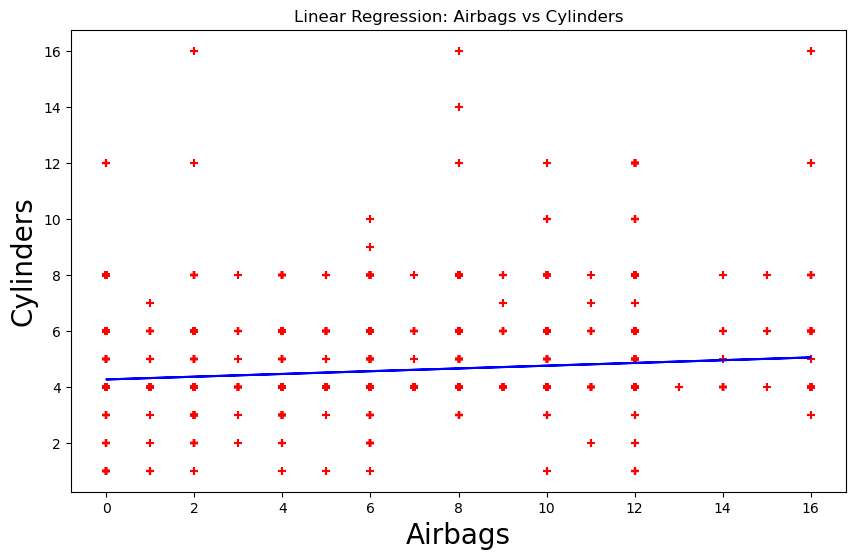

In [94]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Airbags' and 'Cylinders' are columns in your DataFrame
X = df[['Airbags']]
y = df['Cylinders']

regression_model = LinearRegression()
regression_model.fit(X, y)

plt.figure(figsize=(10, 6))

plt.scatter(df['Airbags'], df['Cylinders'], color='red', marker='+')
plt.plot(df['Airbags'], regression_model.predict(df[['Airbags']]), color='blue')

plt.title('Linear Regression: Airbags vs Cylinders')
plt.xlabel('Airbags', fontsize=20)
plt.ylabel('Cylinders', fontsize=20)

plt.show()


In [95]:
import statsmodels.api as sm
square = sm.add_constant(Cylinders) # adding a constant
 
model = sm.OLS(Cylinders, Airbags).fit()
predictions = model.predict(Airbags) 
 
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.694
Model:                            OLS   Adj. R-squared (uncentered):              0.694
Method:                 Least Squares   F-statistic:                          4.373e+04
Date:                Wed, 15 Nov 2023   Prob (F-statistic):                        0.00
Time:                        16:51:14   Log-Likelihood:                         -45814.
No. Observations:               19237   AIC:                                  9.163e+04
Df Residuals:                   19236   BIC:                                  9.164e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
###Рассматриваем линейную зависимость между Prod. year и Price

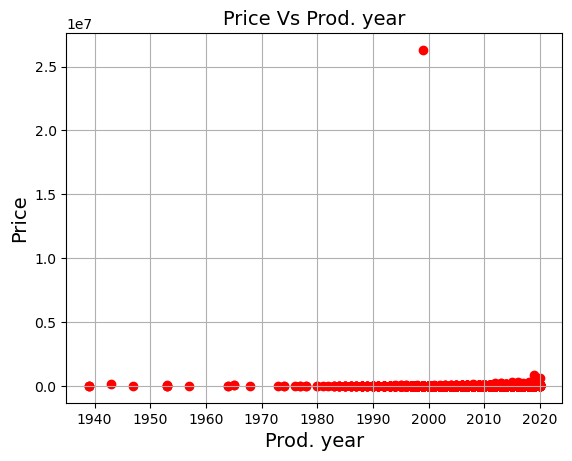

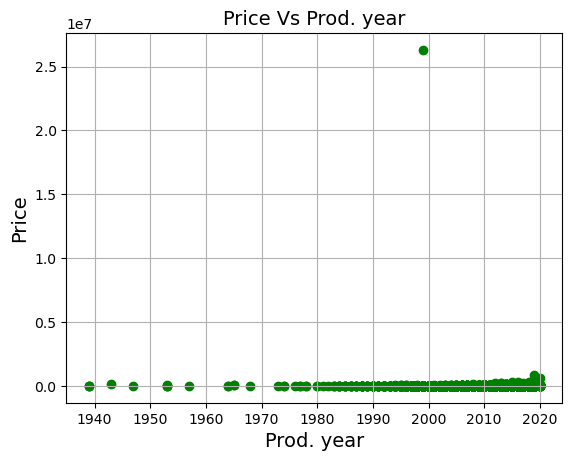

In [99]:
plt.scatter(df['Prod. year'], df['Price'], color='red')
plt.title('Price Vs Prod. year', fontsize=14)
plt.xlabel('Prod. year', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True)
plt.show()
 
plt.scatter(df['Prod. year'], df['Price'], color='green')
plt.title('Price Vs Prod. year', fontsize=14)
plt.xlabel('Prod. year', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True)
plt.show()

<Figure size 2500x600 with 0 Axes>

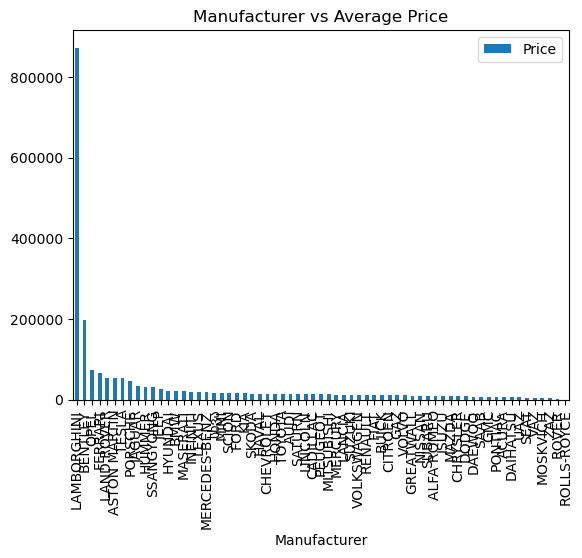

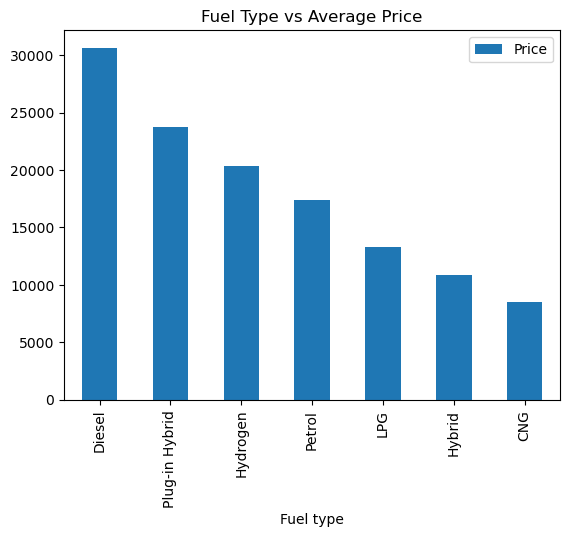

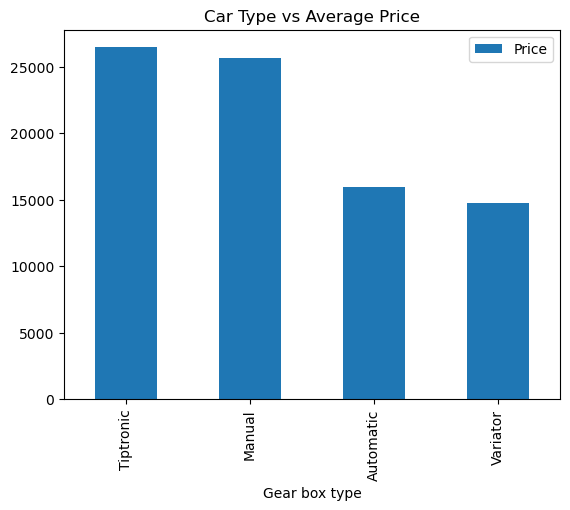

In [117]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(cars.groupby(['Manufacturer'])['Price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Manufacturer vs Average Price')
plt.show()

df = pd.DataFrame(cars.groupby(['Fuel type'])['Price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

df = pd.DataFrame(cars.groupby(['Gear box type'])['Price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()



In [118]:
#### Вывод :
# Lamborgini имеет самую высокую среднюю цену.
# средняя цена на "дизель" выше, чем на газ.
# "Tiptronic" и "Manual" имеют более высокую среднюю цену.